In [5]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm 

import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel('Housing.xlsx')

In [7]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [8]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


### Univariate Regression

In [9]:
X = data['House Size (sq.ft.)'] # input column , independent column
Y = data['House Price'] # Output column # target variable # dependent column or variable

In [10]:
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [11]:
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

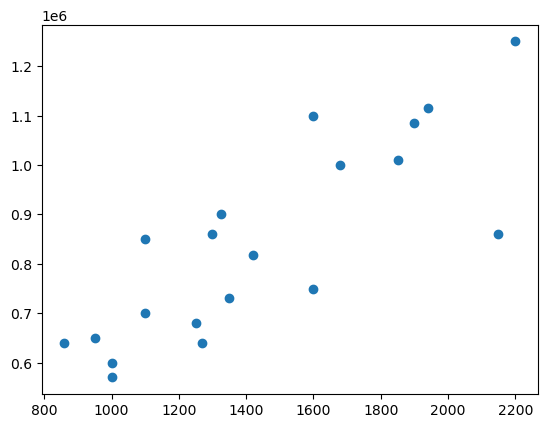

In [12]:
plt.scatter(X,Y) # this is called scatter plot  
plt.show() # this is basically showing as the sq ft inc , price will also inc , # it is showing the relation between X and Y

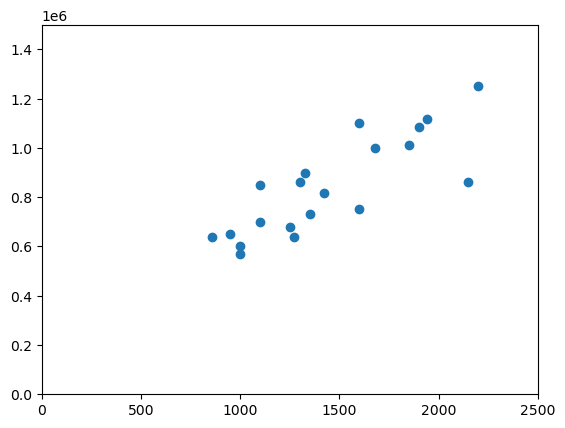

In [13]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.show()

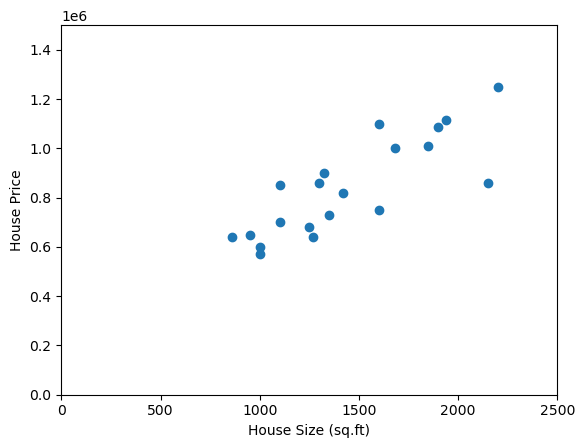

In [14]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft)')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# https://stackoverflow.com/questions/60636444/what-is-the-difference-between-x-test-x-train-y-test-y-train-in-sklearn

In [17]:


# 1). X_train - This includes your all independent variables,these will be used to train the model, also as we have specified 
# the test_size = 0.2, this means 80% of observations from your complete data will be used to train/fit the model and rest
# 40% will be used to test the model.

# 2). X_test - This is remaining 20% portion of the independent variables from the data which will not be used in the training 
# phase and will be used to make predictions to test the accuracy of the model.

# 3). y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against 
# your independent variables, we need to specify our dependent variable while training/fitting the model.

# 4). y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual 
# and predicted categories.

# Now you can fit a model on this data, let's fit sklearn.linear_model.LogisticRegression

In [18]:
# With random_state=0 , we get the same train and test sets across different executions. With random_state=42 , 
#we get the same train and test sets across different executions, 
#but in this time, the train and test sets are different from the previous case with random_state=0 .

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [20]:
X_train=np.array(X_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [22]:
X_test.shape # 4 rows is coming 

(4, 1)

In [23]:
y_test.shape

(4, 1)

In [24]:
y_train.shape # remaining 12 rows will be pass tp the ml algo

(16, 1)

In [25]:
X_train.shape

(16, 1)

In [26]:
from sklearn.linear_model import LinearRegression
linregression=LinearRegression()
linregression.fit(X_train,y_train)

LinearRegression()

In [29]:
X_test

array([[ 950],
       [1300],
       [1250],
       [1600]], dtype=int64)

In [28]:
y_pred=linregression.predict(X_test)
y_pred # 650000

array([[634973.36884605],
       [772590.58762453],
       [752930.98494189],
       [890548.20372037]])

## Intercept

In [36]:
linregression.intercept_ # intercept = c

array([261440.9178759])

## Slope

In [37]:
linregression.coef_  # m 

array([[393.19205365]])

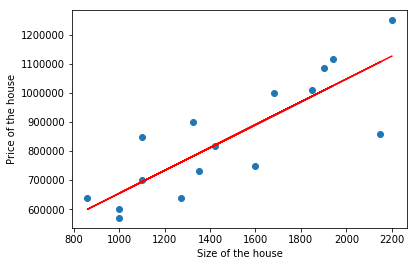

In [43]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train)
plt.plot(X_train,linregression.predict(X_train),'r')
plt.xlabel("Size of the house")
plt.ylabel("Price of the house")
plt.show() # blue point is actual value and d# red line best fit line which is prediction done by linear regression model